# Plan
1. Explore the Dataset and find issues 
2. Fix issues if any
3. Enter the ML Phase and make predictions
4. Select the best model
5. Make predictions
5. deploy the model

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
comb_df = pd.concat([test_df, train_df])

In [6]:
# #Apply Pandas Profiling
# from ydata_profiling import ProfileReport
# prof = ProfileReport(comb_df)
# prof.to_file(output_file = 'Flight.html')

In [7]:
comb_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN


In [8]:
comb_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753.0


In [9]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
comb_df['Date_of_Journey']

0         6/06/2019
1        12/05/2019
2        21/05/2019
3        21/05/2019
4        24/06/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 13354, dtype: object

In [11]:
comb_df['Date_of_Journey'].str.split('/').str[0]
comb_df['Date']=comb_df['Date_of_Journey'].str.split('/').str[0]
comb_df['Month']=comb_df['Date_of_Journey'].str.split('/').str[1]
comb_df['Year']=comb_df['Date_of_Journey'].str.split('/').str[2]

In [12]:
comb_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN,6,06,2019


In [13]:
comb_df['Date']=comb_df['Date'].astype(int)
comb_df['Month']=comb_df['Month'].astype(int)
comb_df['Year']=comb_df['Year'].astype(int)

In [14]:
comb_df.drop('Date_of_Journey',axis=1,inplace=True)
comb_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN,24,6,2019


#Processing Arrival Dates - seperating arrival_time = arrival_hour + arrival_min

In [15]:
comb_df['Arrival_Time'].str.split(' ').str[0]

0        04:25
1        10:20
2        19:00
3        21:00
4        02:45
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [16]:
comb_df['Arrival_Time']=comb_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
comb_df['Arrival_hour']=comb_df['Arrival_Time'].str.split(':').str[0]
comb_df['Arrival_min']=comb_df['Arrival_Time'].str.split(':').str[1]
comb_df['Arrival_hour']=comb_df['Arrival_hour'].astype(int)
comb_df['Arrival_min']=comb_df['Arrival_hour'].astype(int)
comb_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,NaN,6,6,2019,4,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN,12,5,2019,10,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN,21,5,2019,21,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,non-stop,No info,NaN,24,6,2019,2,2


In [17]:
comb_df.drop("Arrival_Time", axis=1, inplace=True)

In [18]:
comb_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,NaN,6,6,2019,4,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,NaN,12,5,2019,10,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,NaN,21,5,2019,19,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,NaN,21,5,2019,21,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,NaN,24,6,2019,2,2


# now the same for departure

In [19]:
comb_df['Dept_hour'] = comb_df['Dep_Time'].str.split(':').str[0]
comb_df['Dept_min'] = comb_df['Dep_Time'].str.split(':').str[1]
comb_df['Dept_hour'] = comb_df['Dept_hour'].astype(int)
comb_df['Dept_min'] = comb_df['Dept_min'].astype(int)
comb_df.drop('Dep_Time', axis=1, inplace=True)

In [20]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [21]:
#Pre-process the total_stops
comb_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops', nan],
      dtype=object)

In [22]:
comb_df['Total_Stops']=comb_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [23]:
#Remove the null values
comb_df[comb_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,9,9,45


In [24]:
comb_df.drop('Route',axis=1,inplace=True)

In [25]:
comb_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,Jet Airways,Delhi,Cochin,10h 55m,1.0,No info,NaN,6,6,2019,4,4,17,30
1,IndiGo,Kolkata,Banglore,4h,1.0,No info,NaN,12,5,2019,10,10,6,20


In [26]:
#Now the same for additional_info
comb_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports', '1 Short layover', 'No Info', 'Red-eye flight',
       '2 Long layover'], dtype=object)

In [27]:
comb_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0        10
1         4
2        23
3        13
4         2
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 13354, dtype: object

In [28]:
comb_df['duration_hour']=comb_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [29]:
comb_df[comb_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,16,16,50,5m
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,16,16,50,5m


In [30]:
comb_df.drop(6474,axis=0,inplace=True)
comb_df.drop(2660,axis=0,inplace=True)

In [31]:
comb_df['duration_hour']= comb_df['duration_hour'].astype('int')


In [32]:
comb_df.drop('Duration',axis=1,inplace=True)

In [33]:
comb_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,Jet Airways,Delhi,Cochin,1.0,No info,NaN,6,6,2019,4,4,17,30,10
1,IndiGo,Kolkata,Banglore,1.0,No info,NaN,12,5,2019,10,10,6,20,4


In [34]:
comb_df['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Trujet'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoders and dictionaries
labelencoders = {}
label_mappings = {}

# Define the categorical columns you want to label encode
categorical_columns = ['Airline', 'Source', 'Destination', 'Additional_Info']

for column in categorical_columns:
    # Create a dictionary of original values before encoding
    original_values = comb_df[column].unique()
    value_dict = {value: i for i, value in enumerate(original_values)}
    label_mappings[column] = value_dict

    # Use LabelEncoder to encode the values based on the created dictionary
    comb_df[column] = comb_df[column].map(value_dict)
    labelencoder = LabelEncoder()
    comb_df[column] = labelencoder.fit_transform(comb_df[column])

# Now, you have dictionaries for each categorical column with the original values as keys
# and label-encoded values as values in the desired format

# For example, to access the mapping for Airlines:
print(label_mappings['Airline'])
print(label_mappings['Source'])
print(label_mappings['Destination'])
print(label_mappings['Additional_Info'])

{'Jet Airways': 0, 'IndiGo': 1, 'Multiple carriers': 2, 'Air Asia': 3, 'Air India': 4, 'Vistara': 5, 'SpiceJet': 6, 'Vistara Premium economy': 7, 'GoAir': 8, 'Multiple carriers Premium economy': 9, 'Jet Airways Business': 10, 'Trujet': 11}
{'Delhi': 0, 'Kolkata': 1, 'Banglore': 2, 'Mumbai': 3, 'Chennai': 4}
{'Cochin': 0, 'Banglore': 1, 'Delhi': 2, 'New Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5}
{'No info': 0, 'In-flight meal not included': 1, 'No check-in baggage included': 2, '1 Long layover': 3, 'Business class': 4, 'Change airports': 5, '1 Short layover': 6, 'No Info': 7, 'Red-eye flight': 8, '2 Long layover': 9}


In [36]:
print(comb_df.shape)
comb_df.head()

(13351, 14)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,0,0,0,1.0,0,NaN,6,6,2019,4,4,17,30,10
1,1,1,1,1.0,0,NaN,12,5,2019,10,10,6,20,4
2,0,0,0,1.0,1,NaN,21,5,2019,19,19,19,15,23
3,2,0,0,1.0,0,NaN,21,5,2019,21,21,8,0,13
4,3,2,2,0.0,0,NaN,24,6,2019,2,2,23,55,2


In [37]:
#handling null values
comb_df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
duration_hour         0
dtype: int64

In [38]:
comb_df.dropna(axis=0,inplace=True)

In [39]:
comb_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dept_hour          0
Dept_min           0
duration_hour      0
dtype: int64

C:\Users\Shuvo\AppData\Local\Temp\ipykernel_10032\1419832597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)
c:\Users\Shuvo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


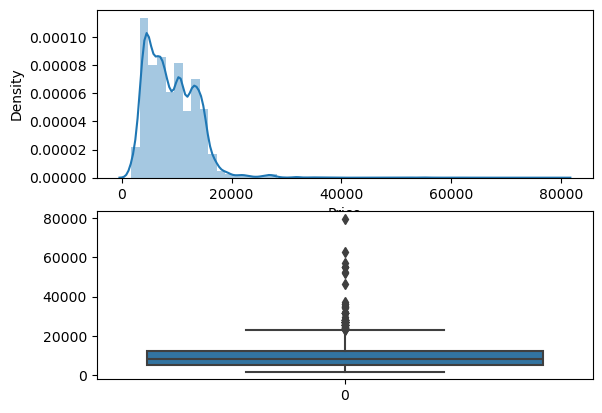

In [40]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

plot(comb_df,'Price')

# Handling outliers:
As there is some outliers in price feature,so we replace it with median.

C:\Users\Shuvo\AppData\Local\Temp\ipykernel_10032\1419832597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)
c:\Users\Shuvo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


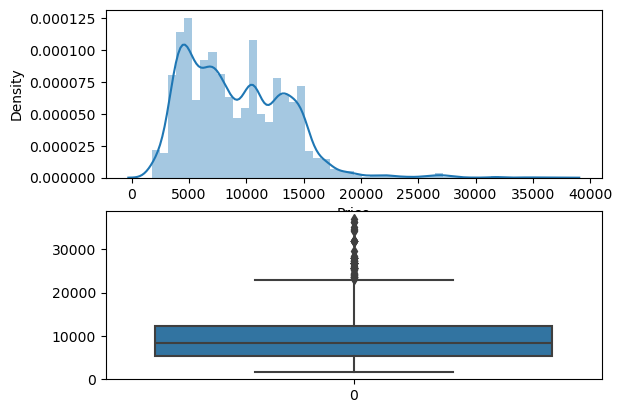

In [41]:
comb_df['Price']=np.where(comb_df['Price']>=40000,comb_df['Price'].median(),comb_df['Price'])
plot(comb_df,'Price')

In [42]:
comb_df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,1,2,3,0.0,0,3897.0,24,3,2019,1,1,22,20,2
1,4,1,1,2.0,0,7662.0,1,5,2019,13,13,5,50,7
2,0,0,0,2.0,0,13882.0,9,6,2019,4,4,9,25,19
3,1,1,1,1.0,0,6218.0,12,5,2019,23,23,18,5,5
4,1,2,3,1.0,0,13302.0,1,3,2019,21,21,16,50,4
5,6,1,1,0.0,0,3873.0,24,6,2019,11,11,9,0,2
6,0,2,3,1.0,1,11087.0,12,3,2019,10,10,18,55,15
7,0,2,3,1.0,0,22270.0,1,3,2019,5,5,8,0,21
8,0,2,3,1.0,1,11087.0,12,3,2019,10,10,8,55,25
9,2,0,0,1.0,0,8625.0,27,5,2019,19,19,11,25,7


# Seperating dataset in X and Y columns

In [43]:
X=comb_df.drop(columns=['Price'],axis=1)
y=comb_df['Price']

# Splitting Train and test into 80-20 ratio

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model = ml_model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Calculate and print regression metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('R² Score:', r2)


In [46]:
predict(LinearRegression())

Model is: LinearRegression()
Mean Absolute Error: 2256.1653531278184
Mean Squared Error: 9555792.520815222
R² Score: 0.5130542181426936


In [47]:
knn = KNeighborsRegressor(n_neighbors = 3)
predict(knn)

Model is: KNeighborsRegressor(n_neighbors=3)
Mean Absolute Error: 1664.3935705368292
Mean Squared Error: 6393953.4468372855
R² Score: 0.6741757783514766


In [48]:
comb_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,1,2,3,0.0,0,3897.0,24,3,2019,1,1,22,20,2


In [49]:
import pandas as pd
from datetime import datetime
import numpy as np  # Make sure to import numpy


#Preprocessing User Info

user_airline_name = 'SpiceJet'
user_source = 'Kolkata'
user_dest = 'Cochin'
user_addinf = 'No info'

if user_airline_name in label_mappings['Airline']:
    airline = label_mappings['Airline'][user_airline_name]
    print(airline)
else:
    # Handle the case where the airline name is not found
    airline = None
    
if user_source in label_mappings['Source']:
    source = label_mappings['Source'][user_source]
    print(source)
else:
    # Handle the case where the airline name is not found
    source = None
    
if user_dest in label_mappings['Destination']:
    dest = label_mappings['Destination'][user_dest]
    print(dest)
else:
    # Handle the case where the airline name is not found
    dest = None
    
if user_addinf in label_mappings['Additional_Info']:
    info = label_mappings['Additional_Info'][user_addinf]
    print(info)
else:
    # Handle the case where the airline name is not found
    info = None



# User's input
user_input = pd.DataFrame({
    'Airline': [airline],
    'Source': [source],
    'Destination': [dest],
    'Total_Stops': [0],
    'Additional_Info': [info],
    'Date': [15],
    'Month': [10],
    'Year': [2019],
    'Arrival_hour': [2],
    'Arrival_min': [1],
    'Dept_hour': [22],
    'Dept_min': [22],
    'duration_hour': [2]
})


6
1
0
0


In [53]:
print(user_input)

   Airline  Source  Destination  Total_Stops  Additional_Info  Date  Month  \
0        6       1            0            0                0    15     10   

   Year  Arrival_hour  Arrival_min  Dept_hour  Dept_min  duration_hour  
0  2019             2            1         22        22              2  


In [50]:
comb_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,1,2,3,0.0,0,3897.0,24,3,2019,1,1,22,20,2


In [51]:
# Make predictions
predicted_price = knn.predict(user_input)

print("Predicted Flight Price: ", predicted_price)


Predicted Flight Price:  [3862.33333333]


In [52]:
import pickle 
pickle.dump(knn, open('model.pkl', 'wb'))